<div style='text-align: center;font-size: 60px;color: #24aaf2;'>
  Machine Learning
</div>

<div style='text-align: center;font-size: 50px;color: #24aaf2;'>
  Introdução
</div>

Este trabalho prático tem como objetivo implementar métodos distintos de machine learning.
Os datasets utilizados são públicos, as suas fontes serão descritas numa secção posterior.

Este projeto está dividido em duas partes:
 - Supervised Learning: Aplicar dois métodos de classificação automática;
 - Unsupervised Learning: Aplicar os algoritmos k-means e apriori;

Optámos por dividir o projeto em dois jupyter notebooks, devido à sua extensão.
Os notebooks são denominados de Supervised_Learning.ipynb e Unsupervised_Learning.ipynb.

O repositório pode ser acedido pelo seguinte link: [github](https://github.com/PedroFerreira-17029/FAI23_Proj2_G02).
### Constituição do grupo:
- Pedro Ferreira (17029) - Responsável pela parte de Supervised Learning.
- Enmanuel Martins (16430) - Responsável pela parte de Unsupervised Learning.

<div style='text-align: center;font-size: 50px;color: #24aaf2;'>
  Supervised Learning<br>
</div>
<div style='text-align: center;font-size: 30px;color: #24aaf2;'>
  (Pedro Ferreira)
</div>

- **Dataset para classificação automática:**

    Para esta parte do projeto utilizámos o dataset Breast Cancer Wisconsin Diagnostic, que pode ser obtido no seguinte link:
    [wbdc](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

    O dataset está presente neste repositório no ficheiro denominado **data.csv**.

    Este dataset, fornecido pela Universidade de Wisconsin contém 10 features para cada núcleo celular, que são fundamentais na análise e diagnóstico de tumores no peito.
    Estas features foram computadas de imagens digitalizadas relativas à extração com agulha fina (FNA) da massa mamária.

    Para cada uma das features, são fornecidos três indicadores:
     - Mean: valor médio;
     - SE: erro padrão;
     - Worst: média dos três maiores ("piores") valores;

    Portanto, temos 30 atributos no total.

    Atributos do dataset:
    - ID: identificador único de cada paciente, não utilizado na análise;
    - Diagnosis: indica se o tumor é benigno (B) ou maligno (M);
    - Dimensões físicas do tumor:
      - radius (distâncias médias dos pontos centrais ao perímetro);
      - texture (desvio padrão dos valores gray-scale);
      - perimeter;
	  - area;
    - Textura e composição do tumor:
      - smoothness (variação local nos comprimentos dos raios);
      - compactness (perimeter^2 / area - 1.0);
      - concavity (gravidade das porções côncavas do contorno);
      - concave points (número de porções côncavas do contorno);
    - Simetria e dimensão fractal do tumor:
      - symmetry;
      - fractal dimension ("coastline approximation" - 1);

    Para mais informações sobre o dataset, consultar o ficheiro wdbc.names presente no repositório.
    Este ficheiro foi descarregado do seguinte link: [wbdc.names](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)



- **Processo de classificação automático:**

    O objetivo desta secção de aprendizagem supervisionada é o de classificar corretamente os casos de tumor benigno (B) vs maligno (M).
    Para tal, foram utilizádos os algoritmos KNN, SVM (Support-vector machine) e uma rede neuronal (ANN).

    Numa secção posterior os registos do dataset serão divididos em 2 partes distintas: treino e teste.

    Quanto aos critérios de selecção dos dados e limpeza do dataset, serão descritos no processo de implementação.

<div style='text-align: center;font-size: 50px;color: #24aaf2;'>
  Implementação
</div>

### Nota: O código presente neste notebook foi implementado de forma a ser executado de forma sequencial. Para instalar o ambiente virtual (anaconda), consultar ficheiro README presente no repositório.

<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Imports
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib import pyplot as plt
from tensorflow import keras
import shap
import datetime

<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Leitura do dataset e Preprocessamento dos dados
</div>

In [2]:
df = pd.read_csv('data.csv', sep=",")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Verificar tipo de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Verificação de valores nulos

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Verificar duplicados

In [5]:
df.duplicated().sum()

0

### Remoção da coluna Unnamed: 32, que contém os valores NaN

In [6]:
df = df.drop(['Unnamed: 32'], axis=1)

### Remoção da coluna id, que não vai ser utilizada na resolução do problema

In [7]:
df = df.drop(columns='id', axis=1)

### Visualizar o target (diagnosis)

<Axes: xlabel='diagnosis', ylabel='count'>

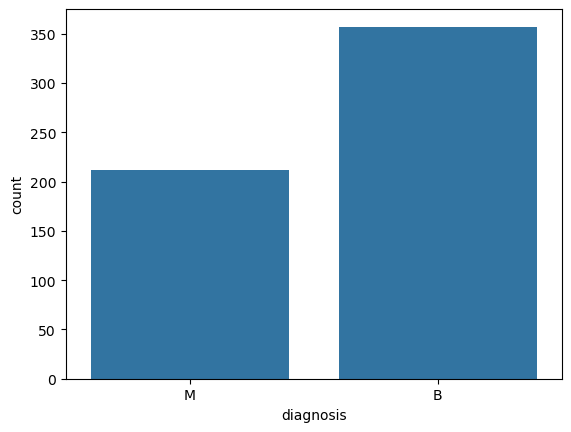

In [8]:
sns.countplot(x='diagnosis', data=df)

<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Verificação da correlação das features
</div>

### One hot encoding para os valores da coluna diagnosis

In [9]:
new_df = df.assign(diagnosis=df['diagnosis'].map({'M': 1, 'B': 0}))

### Verificar balanceamento de casos Maligno vs Benigno

In [10]:
negative, positive = np.bincount(new_df['diagnosis'])
total = negative + positive
print('Total Instances: {}\nPositive(M) Instances: {} ({:.2f}% of total)\n'.format(
    total, positive, 100 * positive / total))

Total Instances: 569
Positive(M) Instances: 212 (37.26% of total)



### Seleccionar colunas diagnosis e colunas referentes a mean

In [11]:
diag_plusmean_columns = new_df[['diagnosis'] + [col for col in new_df.columns if '_mean' in col]]
diag_plusmean_columns

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


### Correlação entre diagnosis e features mean

<Axes: >

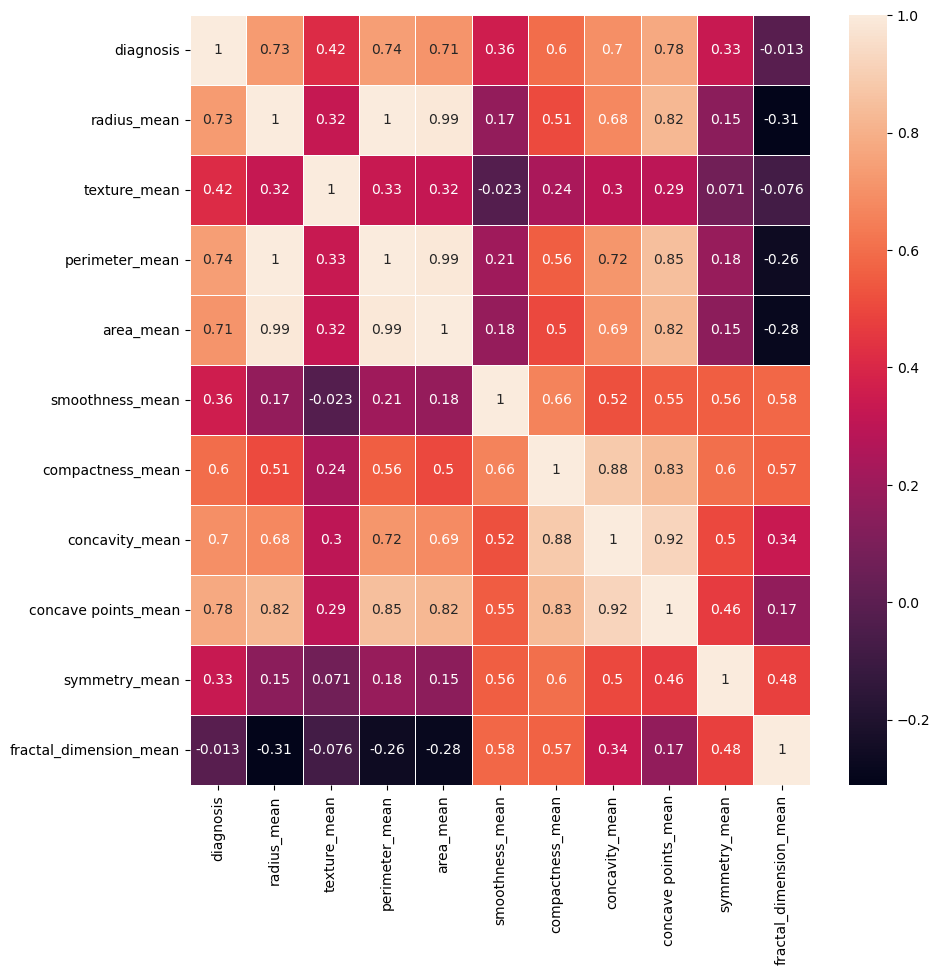

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(diag_plusmean_columns.corr(), annot=True, linewidths=.5, ax=ax)

### Seleccionar os atributos (mean) mais correlacionados com diagnosis

In [13]:
list_mean = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']

### Seleccionar colunas diagnosis e colunas referentes a se (standard error)

In [14]:
diag_plusse_columns = new_df[['diagnosis'] + [col for col in new_df.columns if '_se' in col]]
diag_plusse_columns

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,1,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,1,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,1,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...
564,1,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,1,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,1,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,1,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


### Correlação entre diagnosis e features SE

<Axes: >

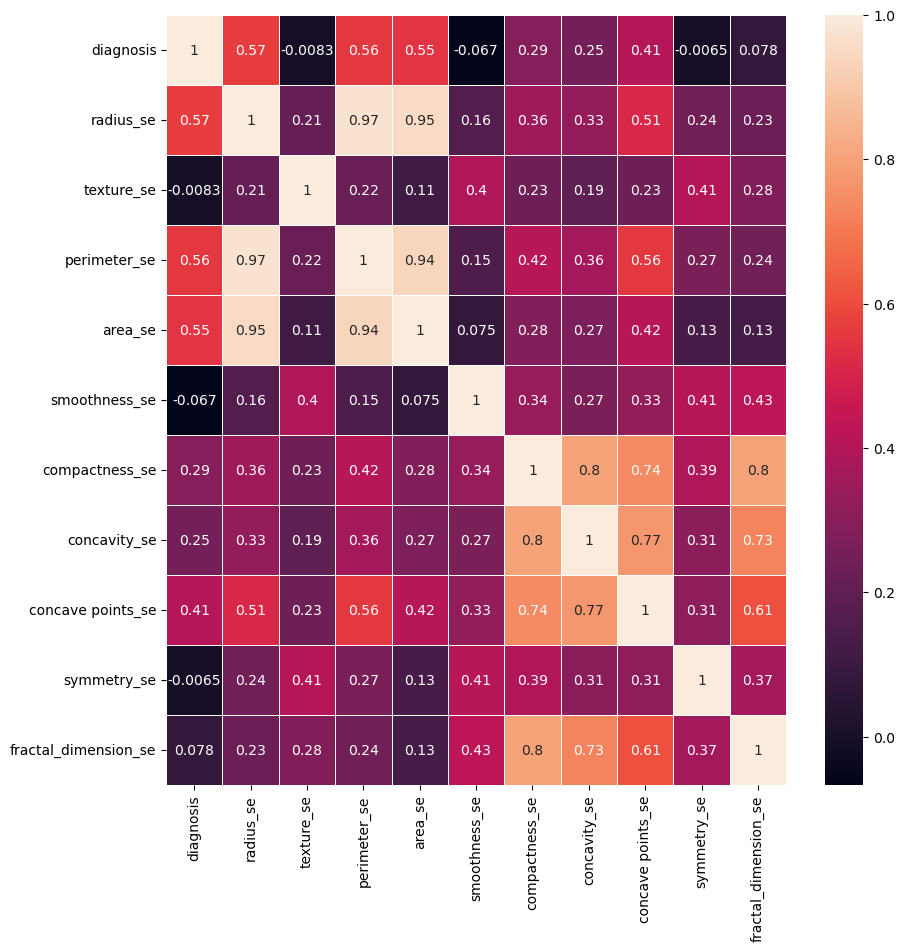

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(diag_plusse_columns.corr(), annot=True, linewidths=.5, ax=ax)

### Seleccionar os atributos (se) mais correlacionados com diagnosis

In [16]:
list_se = ['radius_se', 'perimeter_se', 'area_se', 'smoothness_se']

### Seleccionar colunas diagnosis e colunas referentes a worst

In [17]:
diag_plusworst_columns = new_df[['diagnosis'] + [col for col in new_df.columns if '_worst' in col]]
diag_plusworst_columns

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...
564,1,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Correlação entre diagnosis e features worst

<Axes: >

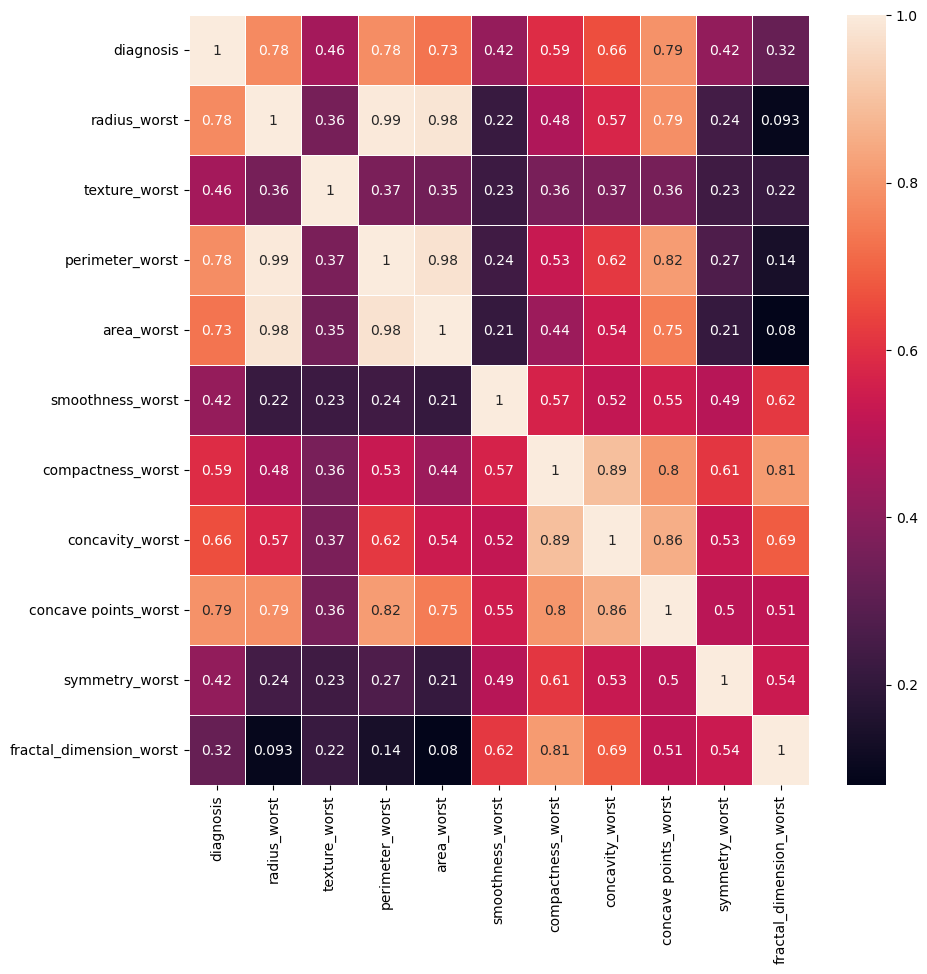

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(diag_plusworst_columns.corr(), annot=True, linewidths=.5, ax=ax)

### Seleccionar os atributos (worst) mais correlacionados com diagnosis

In [19]:
list_worst = ['radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']

<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Pairplots dos atributos mais correlacionados
</div>

### Atributos Mean

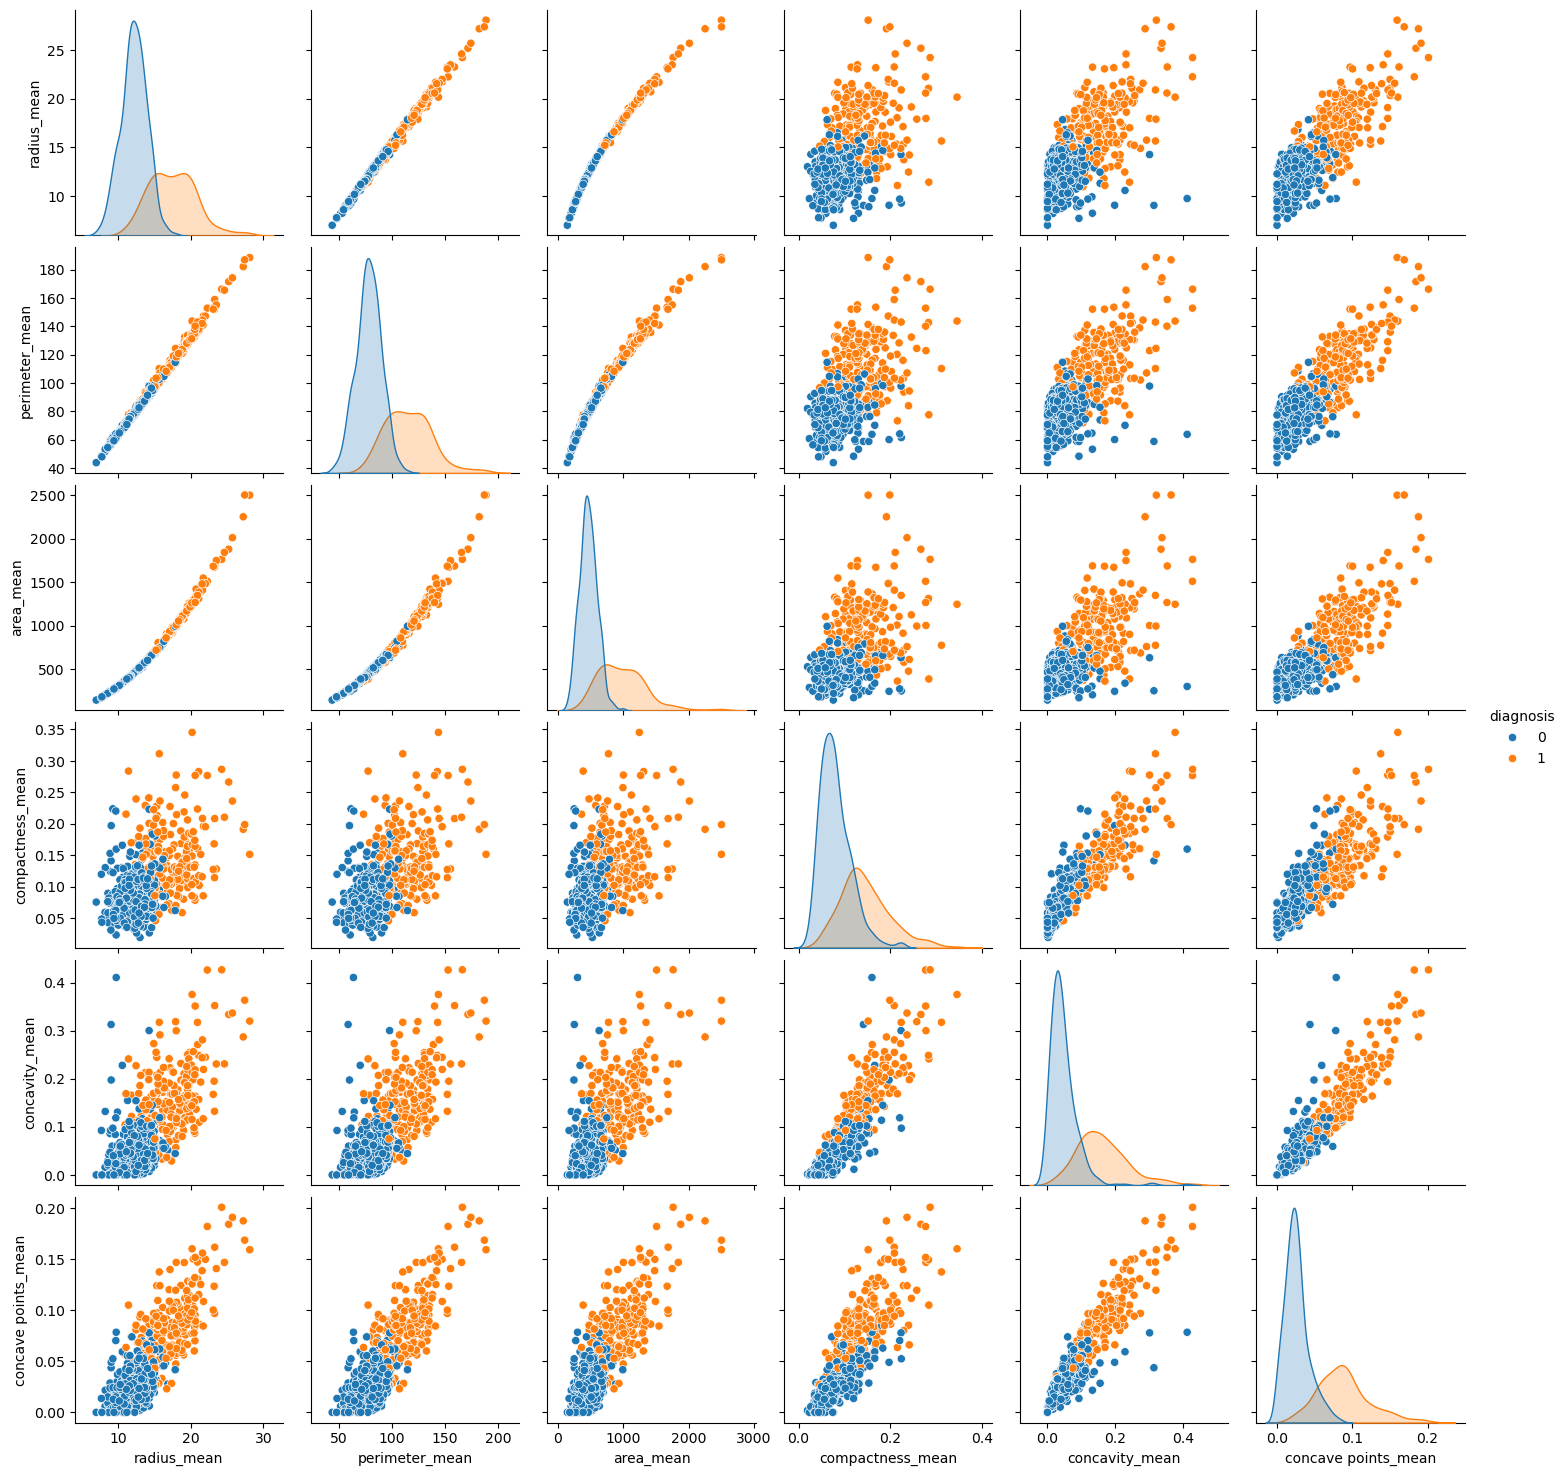

In [20]:
sns.pairplot(new_df[['diagnosis'] + list_mean], hue='diagnosis')

### Atributos Standard Error (se)

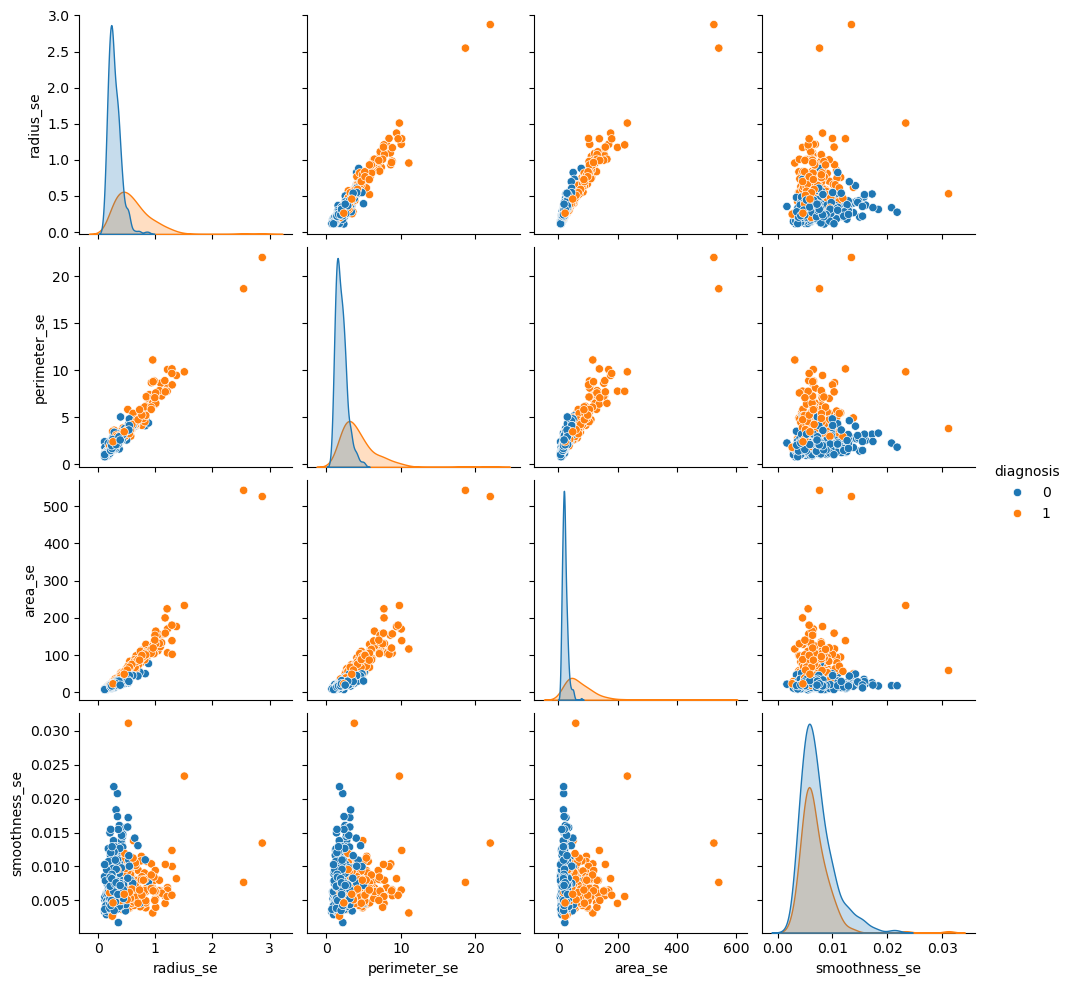

In [21]:
sns.pairplot(new_df[['diagnosis'] + list_se], hue='diagnosis')

### Atributos Worst

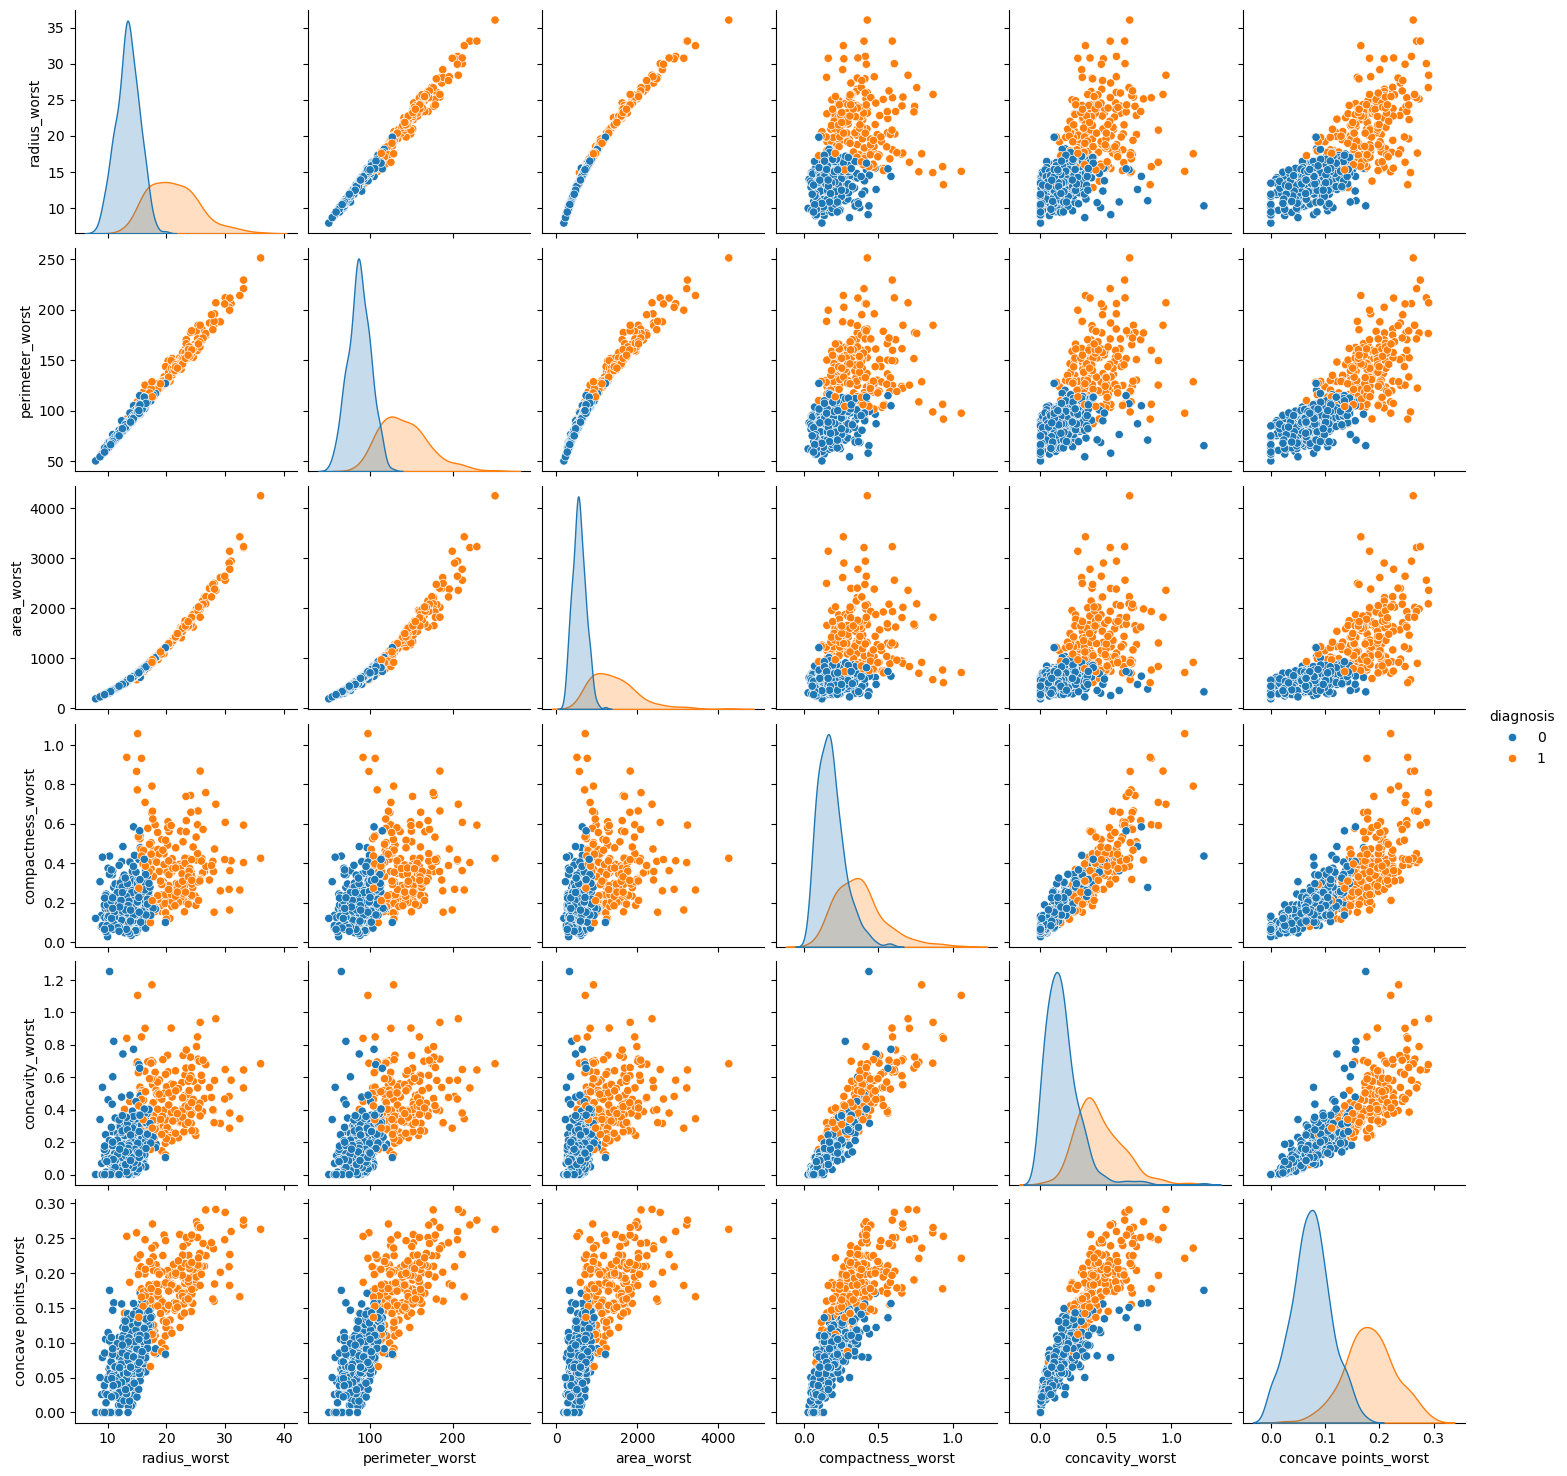

In [22]:
sns.pairplot(new_df[['diagnosis'] + list_worst], hue='diagnosis')

<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Classificação Automática
</div>

<div style='text-align: left;font-size: 30px;color: #24aaf2;'>
  Utilizando todas as features
</div>

### Selecção do target

In [23]:
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(df['diagnosis'].values) # 'M': 1, 'B': 0

### Descrição dos dados (features)

In [24]:
X = df.drop(['diagnosis'], axis=1)
cols = X.columns
X.describe().T



,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Normalizar/Standardizar as features (StandardScaler)

In [25]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
df_scaled = pd.DataFrame(X)
df_scaled.columns = cols
df_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### Divisão train/test

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Modelo ANN
</div>

### Função para criar modelo

In [27]:
def create_model(input_d=30, dropout_rate=0.2, l_rate=0.001):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=16, input_dim=input_d))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(units=1))
    model.add(keras.layers.Activation('sigmoid'))
   
    model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=l_rate),
                metrics=['accuracy'])

    
    return model

### Função para criar nome do modelo a guardar

In [28]:
def model_to_save(m_path, all_features=True):
    if all_features:
        prefix = "Model_AllFeatures_"
    else:
        prefix = "Model_SomeFeatures_"
        
    model_filename = prefix + datetime.datetime.now().strftime("%d_%m_%Y-%Hh_%Mm_%Ss") + ".hdf5"
    model_filepath = os.path.join(m_path, model_filename)
    
    return model_filepath

### Criar o modelo e visualizar a sua arquitetura

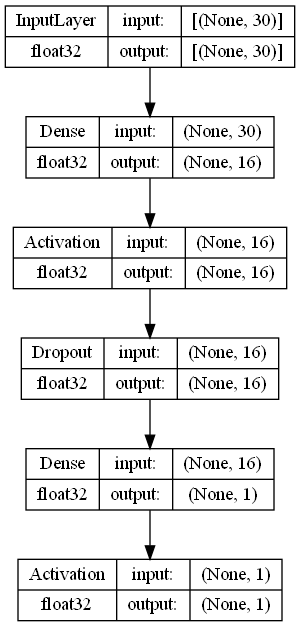

In [29]:
modelspath = r"Teste\Models"
model_filepath = model_to_save(modelspath, all_features=True)
model_checkpoint = keras.callbacks.ModelCheckpoint(model_filepath, monitor='val_accuracy', verbose=0, save_best_only=True)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
mymodel = create_model(input_d=30)
keras.utils.plot_model(mymodel, to_file='model_allfeatures.png', show_shapes=True, show_dtype=True, show_layer_names=False)

### Treinar o modelo

In [30]:
model_fit = mymodel.fit(x_train,
                      y_train,
                      verbose=1,
                      epochs=100,
                      batch_size=64, 
                      validation_data=(x_test,y_test),
                      callbacks=[model_checkpoint, early_stopping_callback])

Epoch 1/100
8/8 [==============================] - 4s 58ms/step - loss: 0.6685 - accuracy: 0.5736 - val_loss: 0.6044 - val_accuracy: 0.6579
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.5774 - accuracy: 0.7143 - val_loss: 0.5384 - val_accuracy: 0.7982
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 0.5240 - accuracy: 0.7912 - val_loss: 0.4843 - val_accuracy: 0.8596
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 0.4670 - accuracy: 0.8286 - val_loss: 0.4401 - val_accuracy: 0.8860
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.4282 - accuracy: 0.8615 - val_loss: 0.4008 - val_accuracy: 0.9035
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.3722 - accuracy: 0.8879 - val_loss: 0.3666 - val_accuracy: 0.9035
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3660 - accuracy: 0.8945 - val_loss: 0.3371 - val_accuracy: 0.9298
Epoch 8/100
8/8 [===

### Carregar modelo do ficheiro

In [31]:
# Recreate the exact same model, including its weights and the optimizer
saved_model = create_model()
saved_model.load_weights(filepath=model_filepath)

### Verificar contribuição das features na previsão do modelo

### Shap Values

Shap (SHapley Additive Explanations), é um método bastante utilizado para analisar as contribuições individuais das features de input no resultado final das previsões do modelo.

In [32]:
# Create an explainer for TensorFlow models with feature names
explainer = shap.Explainer(saved_model, x_train, feature_names=cols)

# Compute SHAP values for test data
shap_values = explainer.shap_values(x_test)

# Convert to pandas dataframe
shap_df = pd.DataFrame(data = shap_values, columns=cols)
shap_df


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.020637,0.044493,0.016213,0.007953,0.009826,0.007311,0.059483,0.028654,0.000349,-0.004997,...,0.014334,0.060202,0.035134,0.014879,0.103161,0.034245,0.020236,0.015184,0.026925,-0.000462
1,-0.025560,-0.024335,-0.038706,-0.030674,-0.000868,-0.003840,-0.021398,-0.012456,-0.002469,0.000024,...,-0.049205,-0.063246,-0.016743,-0.029639,0.013096,-0.012911,-0.014344,-0.006754,0.000358,-0.003939
2,-0.060421,-0.000107,-0.067732,-0.044919,-0.000804,0.002057,0.003380,-0.022355,0.009467,-0.009030,...,-0.067626,0.014772,-0.072016,-0.043483,0.022978,0.006031,0.011559,-0.002068,0.012985,0.017503
3,0.036995,0.012554,0.043370,0.044094,0.001103,0.003818,0.033428,0.038534,0.000786,0.000389,...,0.038158,0.043968,0.055364,0.042064,0.035284,0.021480,0.026349,0.009179,0.021685,0.002992
4,-0.036206,-0.003475,-0.043248,-0.014087,-0.000425,-0.000620,-0.012713,0.000197,0.024733,-0.001452,...,-0.043568,-0.019200,-0.017834,-0.046892,-0.058146,-0.012210,-0.016237,-0.003446,-0.002092,0.002429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.010167,-0.007783,-0.029702,-0.021192,-0.003631,-0.010854,-0.033193,-0.027136,-0.006476,0.003991,...,-0.014532,-0.044394,-0.032391,-0.037854,-0.025767,-0.016976,-0.020136,-0.004502,-0.028881,-0.004994
110,-0.032599,-0.002449,-0.049719,-0.018418,-0.001414,-0.004147,-0.038671,-0.016659,-0.003176,-0.001066,...,-0.049300,-0.014367,-0.050292,-0.036227,-0.001407,-0.021109,-0.008160,-0.005675,0.001675,-0.004593
111,-0.005679,-0.008853,-0.034905,-0.027734,-0.000960,-0.000662,-0.024109,-0.025443,-0.001517,-0.002705,...,-0.028082,-0.024977,-0.043322,-0.032889,-0.009986,-0.010322,-0.014703,-0.005058,-0.020652,-0.002233
112,-0.029716,0.046953,-0.062410,-0.017046,-0.002328,-0.010556,-0.048984,-0.019815,0.001684,0.004041,...,-0.035429,0.049946,-0.035319,-0.037599,-0.064043,-0.031213,-0.026667,-0.002869,-0.039455,0.005670


O objeto shap_values é um array 2D.
Cada linha corresponde a uma única previsão efetuada pelo modelo.
Cada coluna representa uma feature utilizada como input do modelo.
Valores shap positivos significam um impacto positivo na previsão (levam o modelo a prever 1-Maligno).
Valores negativos significam o inverso (0-Benigno).

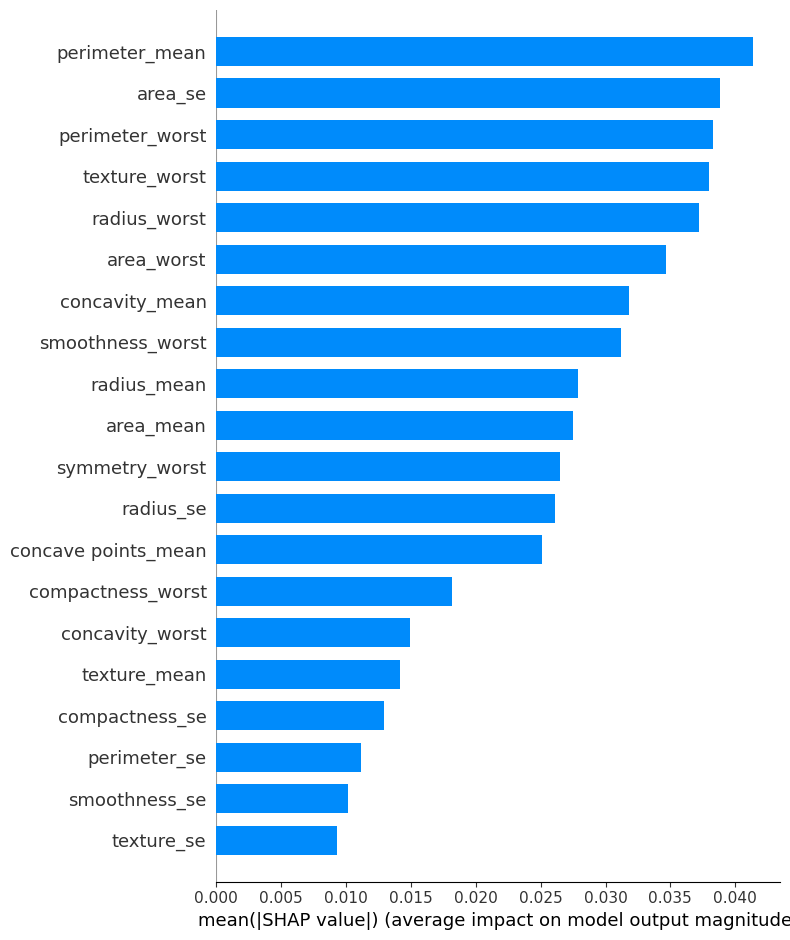

In [33]:
# Create a SHAP summary plot (type bar)
shap_summary_bar = shap.summary_plot(shap_values, x_test, plot_type='bar', feature_names=cols)

O summary_plot do tipo barras, ordena as features pela sua ordem de importância na forma como influenciaram a previsão do modelo.
A ordem de importância das features, no caso da ANN, varia consoante o treino.
Portanto, é possível que ao executar novamente este notebook, a feature que surje no topo não seja a mesma mostrada na figura acima.

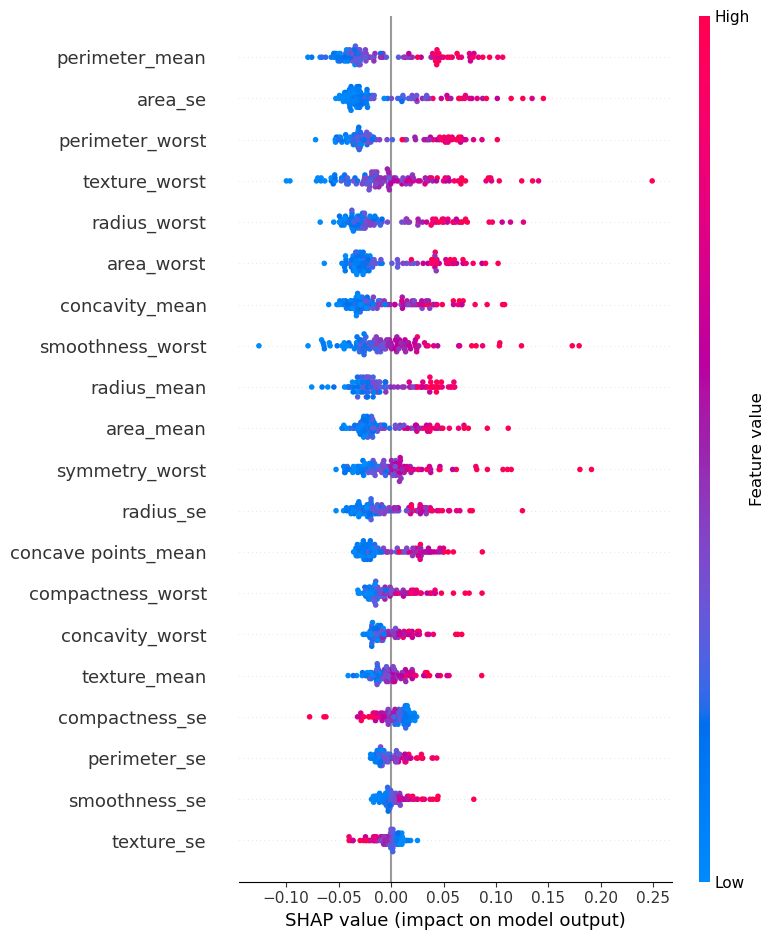

In [34]:
# Create a SHAP summary plot (dot chart)
shap_summary_dotChart = shap.summary_plot(shap_values, x_test, feature_names=cols)

No summary_plot do tipo dot charts, o eixo x representa o shap_value e o eixo y representa as features de input.
Neste caso, a ordem das features no eixo y não tem relevância.
A cor vermelha representa um valor mais alto dessa feature, enquanto que a cor azul representa um valor mais baixo.
Com este tipo de diagrama, baseado na distribuição de pontos vermelhos e azuis, podemos analisar o impacto geral que cada feature tem na direção (0 ou 1) na previsão do modelo.
Na figura acima, podemos verificar que por exemplo para a feature perimeter_worst, baixos valores dessa feature levam a shap_values negativos. Portanto, baixos valores de perimeter_worst direccionam o modelo a prever 0-Benigno.

### Visualizar gráficos de Loss e Accuracy durante as Epochs

In [35]:
def plot_metrics(modelfit, metric, title, color1='blue', color2='red'):
    metric_cap = metric.capitalize()
    plt.plot(modelfit.history[metric], color1, label=f'Training {metric_cap}')
    plt.plot(modelfit.history[f'val_{metric}'], color2, label=f'Validation {metric_cap}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric_cap)
    plt.legend()
    plt.show()

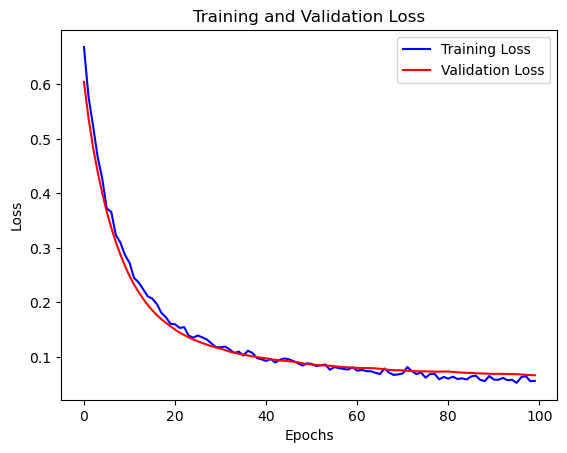

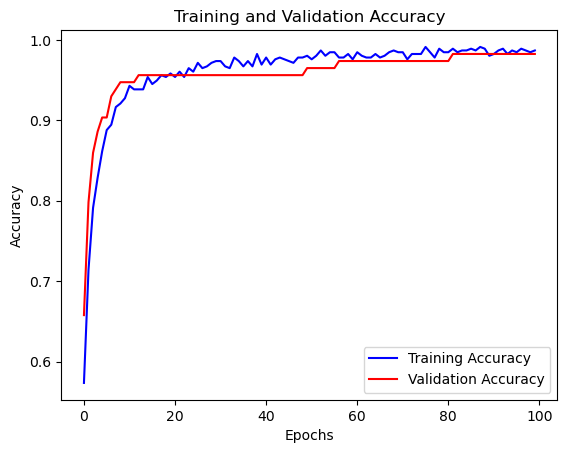

In [36]:
plot_metrics(model_fit, 'loss', 'Training and Validation Loss')
plot_metrics(model_fit, 'accuracy', 'Training and Validation Accuracy')

### Previsão

In [37]:
y_pred = saved_model.predict(x_test)
y_pred = (y_pred > 0.5) # True (1) or False(0)

4/4 [==============================] - 0s 5ms/step


### Resultados

              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Axes: >

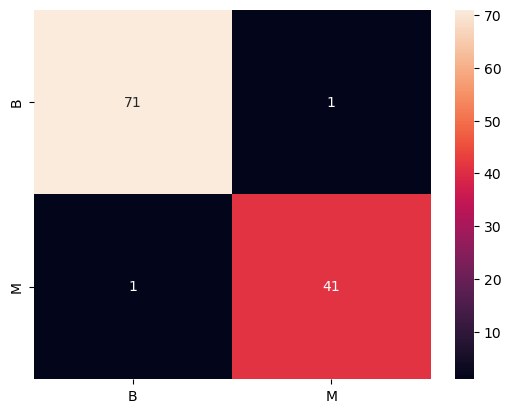

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
cls_report = classification_report(y_test, y_pred, target_names=['B', 'M'])
print(cls_report)
sns.heatmap(conf_matrix, annot=True,  xticklabels=['B', 'M'], yticklabels=['B', 'M'])

<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Modelo KNN
</div>

### Encontrar o melhor parametro K utilizando GridSearchCV

Utilizámos o parâmetro cv (cross-validation) = 10 no GridSearchCV, para dividir o dataset de treino em 10 partições.
O grid search realizará o treino e a avaliação 10 vezes, utilizando de cada vez uma partição diferente como conjunto de validação e os dados restantes como conjunto de treino. 

In [39]:
hyper_param = {'n_neighbors': list(range(2,15))}
bestKNN_model = GridSearchCV(KNeighborsClassifier(), param_grid=hyper_param, cv=10, scoring='accuracy', verbose=1)
bestKNN_model.fit(x_train, y_train)
print(bestKNN_model.best_params_)
accuracy = bestKNN_model.best_score_ *100
print("Accuracy for Training: {:.2f}%".format(accuracy))

Fitting 10 folds for each of 13 candidates, totalling 130 fits
{'n_neighbors': 5}
Accuracy for Training: 97.16%


### Visualizar valores de Mean_Accuracy vs Número de vizinhos (K)

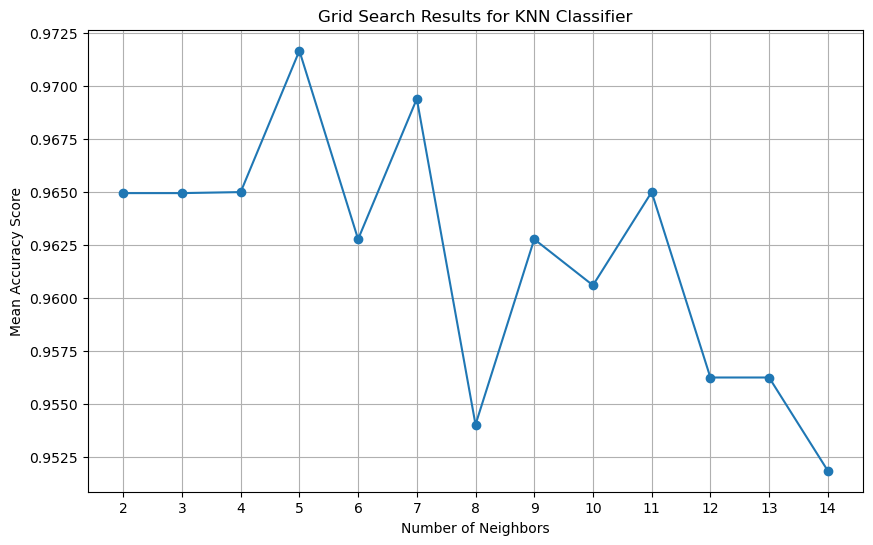

In [40]:
hyper_param_values = hyper_param['n_neighbors']
accuracy_scores = bestKNN_model.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(hyper_param_values, accuracy_scores, marker='o')
plt.title('Grid Search Results for KNN Classifier')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy Score')
plt.xticks(hyper_param_values)
plt.grid(True)
plt.show()

### Previsão

In [41]:
y_pred_Knn = bestKNN_model.predict(x_test)
test_accuracy = accuracy_score(y_test,y_pred_Knn)*100
print("Accuracy for Test : {:.2f}%".format(test_accuracy))

Accuracy for Test : 96.49%


### Resultados

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<Axes: >

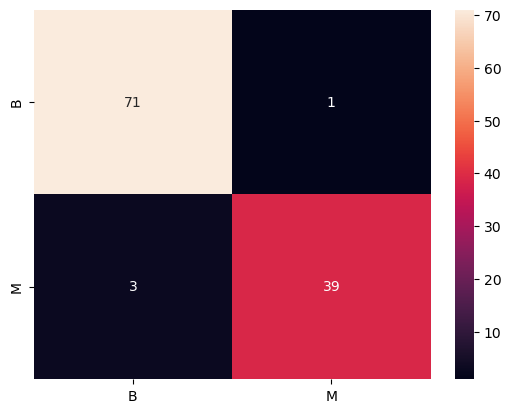

In [42]:
knn_best_report = classification_report(y_test, y_pred_Knn, target_names=['B', 'M'])
print(knn_best_report)
cf_matrix = confusion_matrix(y_test, y_pred_Knn)
sns.heatmap(cf_matrix, annot=True, xticklabels=['B', 'M'], yticklabels=['B', 'M'])

<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Modelo SVM
</div>

### Encontrar os melhores parametros para o SVM

Utilizámos o parâmetro cv (cross-validation) = 10 no GridSearchCV.
Como hyperparametros foram testados o C (Parametro de regularização do SVM), Gamma (coeficiente do kernel) e o tipo de kernel ('rbf', 'linear', 'poly').

In [43]:
hyperparam_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly']}  

bestSvc_model = GridSearchCV(SVC(random_state=1), hyperparam_grid, refit=True,verbose=2, cv=10, scoring='accuracy')
bestSvc_model.fit(x_train,y_train)
print(bestSvc_model.best_params_) 
print(bestSvc_model.best_estimator_)
accuracy_Svc = bestSvc_model.best_score_ *100
print("Accuracy for Training: {:.2f}%".format(accuracy_Svc))

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1,

### Visualizar Mean Test Score para os hyperparametros do SVM (GridSearch)

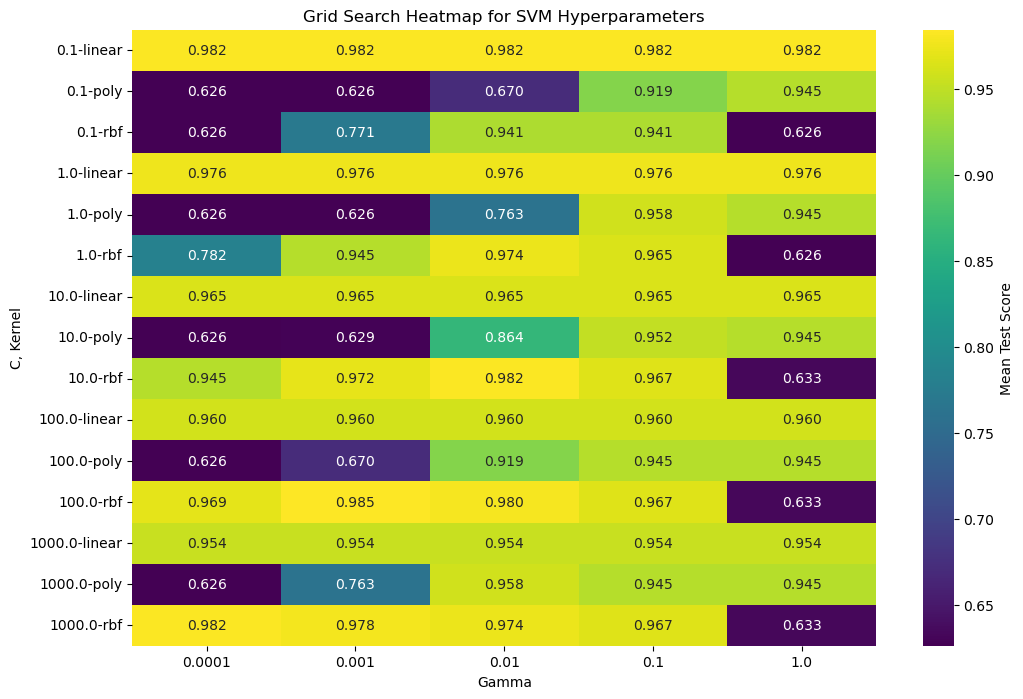

In [44]:
results = pd.DataFrame(bestSvc_model.cv_results_)

# Use pivot_table to handle duplicates
heatmap_data = results.pivot_table(index=['param_C', 'param_kernel'], columns='param_gamma', values='mean_test_score', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Heatmap for SVM Hyperparameters')
plt.xlabel('Gamma')
plt.ylabel('C, Kernel')
plt.show()

### Previsão

In [45]:
y_pred_Svc = bestSvc_model.predict(x_test)
test_accuracy_Svc = accuracy_score(y_test,y_pred_Svc)*100
print("Accuracy for Test : {:.2f}%".format(test_accuracy_Svc))

Accuracy for Test : 97.37%


### Resultados

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Axes: >

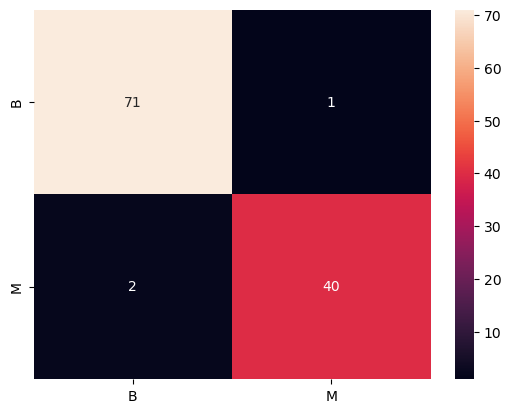

In [46]:
svc_best_report = classification_report(y_test, y_pred_Svc, target_names=['B', 'M'])
print(svc_best_report)
cf_matrix_Svc = confusion_matrix(y_test, y_pred_Svc)
sns.heatmap(cf_matrix_Svc, annot=True, xticklabels=['B', 'M'], yticklabels=['B', 'M'])

<div style='text-align: left;font-size: 35px;color: #24aaf2;'>
  Utilizar apenas features mais correlacionadas
</div>

Realizar o mesmo processo utilizando apenas as features mais correlacionadas (determinadas numa secção inicial do notebook) com o target.
Vamos apenas utilizar um dos modelos, para não ficar muito extenso.

### Features

In [47]:
X2 = new_df[list_mean + list_se + list_worst]
cols2 = X2.columns

In [48]:
scaler = StandardScaler()
scaler.fit(X2)
X2 = scaler.transform(X2)
df_scaled2 = pd.DataFrame(X2)
df_scaled2.columns = cols2
df_scaled2

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,smoothness_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1.097064,1.269934,0.984375,3.283515,2.652874,2.532475,2.489734,2.833031,2.487578,-0.214002,1.886690,2.303601,2.001237,2.616665,2.109526,2.296076
1,1.829821,1.685955,1.908708,-0.487072,-0.023846,0.548144,0.499255,0.263327,0.742402,-0.605351,1.805927,1.535126,1.890489,-0.430444,-0.146749,1.087084
2,1.579888,1.566503,1.558884,1.052926,1.363478,2.037231,1.228676,0.850928,1.181336,-0.297005,1.511870,1.347475,1.456285,1.082932,0.854974,1.955000
3,-0.768909,-0.592687,-0.764464,3.402909,1.915897,1.451707,0.326373,0.286593,-0.288378,0.689702,-0.281464,-0.249939,-0.550021,3.893397,1.989588,2.175786
4,1.750297,1.776573,1.826229,0.539340,1.371011,1.428493,1.270543,1.273189,1.190357,1.483067,1.298575,1.338539,1.220724,-0.313395,0.613179,0.729259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,2.060786,2.343856,0.219060,1.947285,2.320965,2.782080,2.379583,2.604187,1.086384,1.901185,1.752563,2.015301,-0.273318,0.664512,1.629151
565,1.704854,1.615931,1.723842,-0.017833,0.693043,1.263669,1.300499,1.156857,1.291565,-0.424010,1.536720,1.421940,1.494959,-0.394820,0.236573,0.733827
566,0.702284,0.672676,0.577953,-0.038680,0.046588,0.105777,0.184892,0.276693,0.180698,-0.379342,0.561361,0.579001,0.427906,0.350735,0.326767,0.414069
567,1.838341,1.982524,1.735218,3.272144,3.296944,2.658866,1.157935,1.438530,1.009503,-0.173000,1.961239,2.303601,1.653171,3.904848,3.197605,2.289985


### Divisão treino/teste

In [49]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y, test_size=0.2, random_state=1, stratify=Y)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(455, 16)
(114, 16)
(455,)
(114,)


### Utilizando por exemplo a Ann

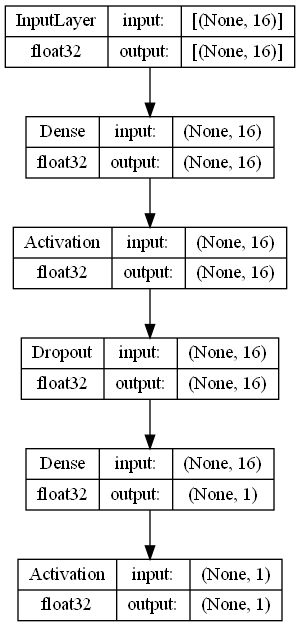

In [50]:
model_filepath2 = model_to_save(modelspath, all_features=False)
model_checkpoint2 = keras.callbacks.ModelCheckpoint(model_filepath2, monitor='val_accuracy', verbose=0, save_best_only=True)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
mymodel2 = create_model(input_d=16)
keras.utils.plot_model(mymodel2, to_file='model_somefeatures.png', show_shapes=True, show_dtype=True, show_layer_names=False)

### Treino

In [51]:
model2_fit = mymodel2.fit(x_train2,
                      y_train2,
                      verbose=1,
                      epochs=100,
                      batch_size=64, 
                      validation_data=(x_test2,y_test2),
                      callbacks=[model_checkpoint2, early_stopping_callback])

Epoch 1/100


8/8 [==============================] - 1s 43ms/step - loss: 0.6057 - accuracy: 0.6791 - val_loss: 0.5483 - val_accuracy: 0.7982
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 0.5286 - accuracy: 0.7934 - val_loss: 0.4926 - val_accuracy: 0.8596
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 0.4858 - accuracy: 0.8286 - val_loss: 0.4452 - val_accuracy: 0.8860
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.4445 - accuracy: 0.8615 - val_loss: 0.4044 - val_accuracy: 0.9211
Epoch 5/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3985 - accuracy: 0.8703 - val_loss: 0.3693 - val_accuracy: 0.9386
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3830 - accuracy: 0.8769 - val_loss: 0.3395 - val_accuracy: 0.9474
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 0.3394 - accuracy: 0.9055 - val_loss: 0.3144 - val_accuracy: 0.9561
Epoch 8/100
8/8 [===============

### Carregar modelo do ficheiro

In [52]:
# Recreate the exact same model, including its weights and the optimizer
saved_model2 = create_model(input_d=16)
saved_model2.load_weights(filepath=model_filepath2)

### Visualizar gráficos de Loss e Accuracy durante as Epochs

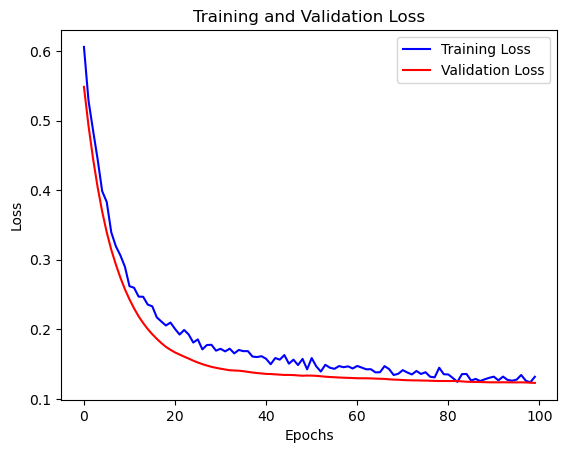

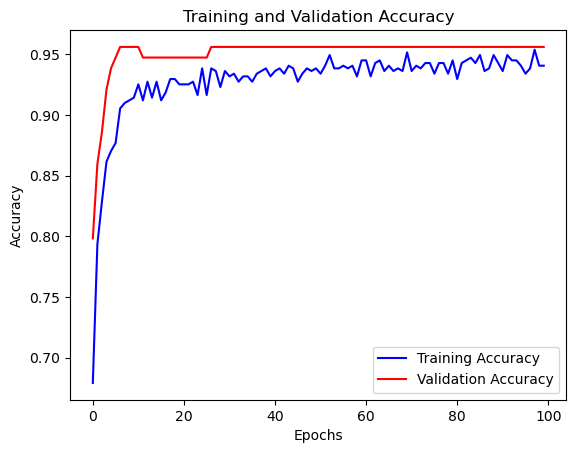

In [53]:
plot_metrics(model2_fit, 'loss', 'Training and Validation Loss')
plot_metrics(model2_fit, 'accuracy', 'Training and Validation Accuracy')

### Verificar contribuição das features na previsão do modelo

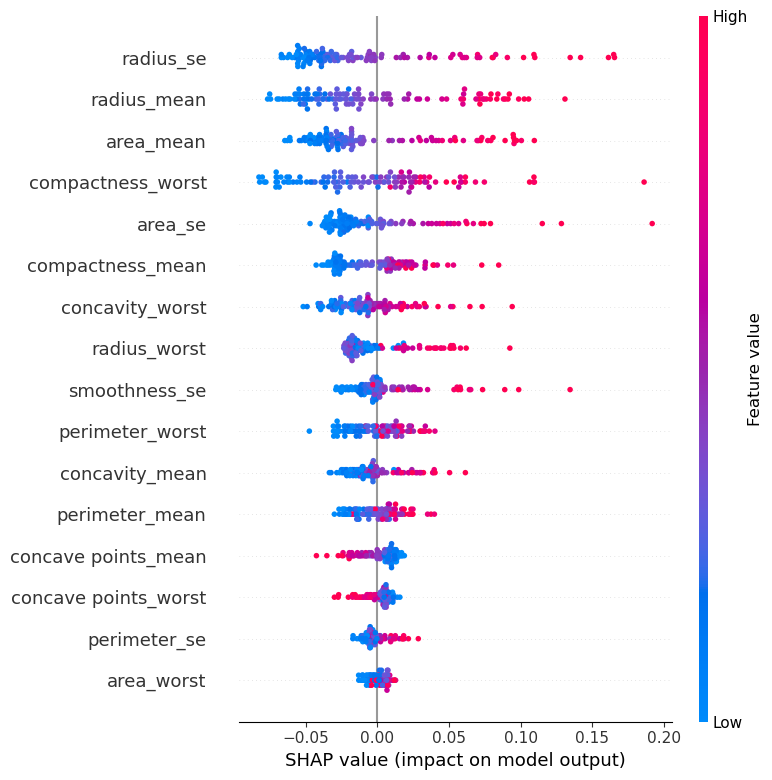

In [54]:
# Create a Explainer for TensorFlow models with feature names
explainer2 = shap.Explainer(saved_model2, x_train2, feature_names=cols2)

# Compute SHAP values for the test data
shap_values2 = explainer2.shap_values(x_test2)

# Dot chart
shap_summary2 = shap.summary_plot(shap_values2, x_test2, feature_names=cols2)

### Previsão e Resultados

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Axes: >

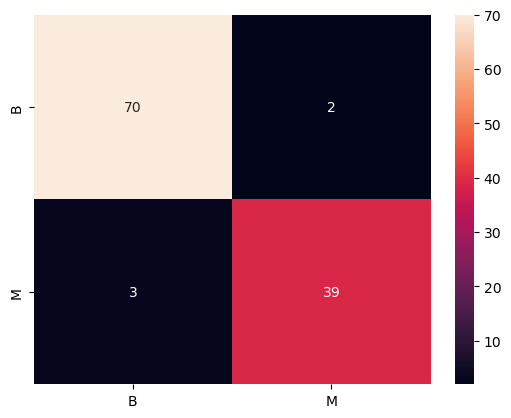

In [55]:
y_pred2 = saved_model2.predict(x_test2)
y_pred2 = (y_pred2 > 0.5) # True (1) or False(0)
cls_report2 = classification_report(y_test2, y_pred2, target_names=['B', 'M'])
print(cls_report2)
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(conf_matrix2, annot=True, xticklabels=['B', 'M'], yticklabels=['B', 'M'])

<div style='text-align: center;font-size: 50px;color: #24aaf2;'>
  Análise e discussão dos resultados
</div>

Neste ponto inicial, vamos discutir os resultados obtidos (para a ANN) nos dois casos explorados (utilizando todas as features disponíveis no dataset versus utilizando apenas aquelas mais correlacionadas com o target (diagnosis)).

Como podemos observar, os resultados foram ligeiramente inferiores utilizando apenas as features mais correlacionadas com o target.
O que indica que as features desconsideradas neste exemplo final, têm uma certa relevância no processo de classificação.

Poderíamos também ter experimentado retirar as features com maior correlação entre elas, no caso de estas features se tornarem um pouco "redundantes" na sua contribuição para o output dos modelos utilizados.

Relativamente aos resultados (com todas as features) para os vários modelos utilizados neste projeto, podemos verificar que o modelo que obteve melhores resultados foi a ANN. De salientar, que os resultados da rede neuronal variam consoante o seu treino. O resultado apresentado neste notebook foi o melhor que obtivémos.

A estrutura da matriz de confusão para os vários modelos é a seguinte:

|          | Previsto Benigno (B) | Previsto Maligno (M)     |
|----------|----------------------|--------------------------|
| Real Benigno (B) | TN  | FP     |
| Real Maligno (M) | FN  |  TP    |

Quanto às métricas obtidas no classification report, temos Precision = $\frac{TP}{TP + FP}$, Recall = $\frac{TP}{TP + FN}$ e F1 Score = $\frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$


No caso da **rede neuronal (ANN)**, obtivémos um valor de Precision (classe B = 0.99, classe M = 0.98), Recall (classe B = 0.99, classe M = 0.98) e F1 Score (classe B = 0.99, classe M = 0.98).
Quanto à matriz de confusão:

|          | Previsto Benigno (B) | Previsto Maligno (M)     |
|----------|----------------------|--------------------------|
| Real Benigno (B) | 71   | 1     |
| Real Maligno (M) | 1    |  41   |


Relativamente ao modelo **SVM**, obtivémos um valor de Precision (classe B = 0.97, classe M = 0.98), Recall (classe B = 0.99, classe M = 0.95) e F1 Score (classe B = 0.98, classe M = 0.96).
Quanto à matriz de confusão:


|          | Previsto Benigno (B) | Previsto Maligno (M)     |
|----------|----------------------|--------------------------|
| Real Benigno (B) | 71   | 1     |
| Real Maligno (M) | 2    |  40   |


Finalmente, quanto ao modelo **KNN**, obtivémos um valor de Precision (classe B = 0.96, classe M = 0.97), Recall (classe B = 0.99, classe M = 0.93) e F1 Score (classe B = 0.97, classe M = 0.95).
Quanto à matriz de confusão:


|          | Previsto Benigno (B) | Previsto Maligno (M)     |
|----------|----------------------|--------------------------|
| Real Benigno (B) | 71   | 1     |
| Real Maligno (M) | 3    | 39    |

O modelo KNN foi o que obteve piores resultados.